# Прогноз оттока посетителей сети фитнес-центров
# <a name="table_of_contents"></a><font color="red">Задачи исследования</font>

# [Шаг 1. Загрузите данные](#stage_1)
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

#### Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

#### Текущие поля в датасете:
Данные пользователя за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

#### Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

## Путь к файлу
- Путь к файлу: /datasets/gym_churn.csv



# [Шаг 2. Проведите исследовательский анализ данных (EDA)](#stage_2)

- Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
- Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Постройте матрицу корреляций и отобразите её.



# [Шаг 3. Постройте модель прогнозирования оттока пользователей](#stage_3)

Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке любыми двумя способами: логистической регрессией и случайным лесом.
- Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?



# [Шаг 4. Сделайте кластеризацию пользователей](#stage_4)

Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):
- Стандартизируйте данные.
- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
- Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?



# [Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#stage_5)

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания.
Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

<a name="stage_1"></a>
# Шаг 1. Загрузите данные


[К оглавлению](#table_of_contents)

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
#доп настройки
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.expand_frame_repr = False
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
198,0,1,1,1,1,12,1,27,111.27,12.00,5,0.79,0.88,0
1946,0,0,0,0,1,6,0,32,218.93,6.00,13,2.61,2.69,0
426,0,0,0,0,1,1,0,22,165.30,1.00,0,0.75,0.58,1
2020,1,1,1,1,1,12,1,31,103.97,12.00,0,2.07,2.08,0
3570,0,1,1,1,1,6,0,26,6.04,6.00,1,1.59,1.66,0
3879,0,1,1,0,1,1,1,34,92.43,1.00,9,3.09,3.02,0
2749,1,1,1,1,1,12,0,31,58.07,11.00,4,1.30,1.44,0
3025,0,1,1,1,1,1,1,27,61.35,1.00,1,1.23,0.81,1
3450,1,0,0,0,1,12,0,30,101.75,12.00,10,3.60,3.65,0
3694,0,1,0,0,0,1,0,30,118.20,1.00,0,1.77,1.79,0


In [5]:
df.columns.tolist()

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month',
 'Churn']

In [6]:
df.columns = [i.lower() for i in df]

In [7]:
df.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [8]:
df = df[['gender',
         'near_location',
         'partner',
         'promo_friends',
         'phone',
         'group_visits',
         'age',
         'avg_additional_charges_total',
         'contract_period',
         'month_to_end_contract',
         'lifetime',
         'avg_class_frequency_total',
         'avg_class_frequency_current_month',
         'churn']]

# Поменял логику столбцов — бинарные признаки рядом с бинарными.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
contract_period                      4000 non-null int64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [10]:
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
group_visits                         0
age                                  0
avg_additional_charges_total         0
contract_period                      0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [11]:
df.duplicated().sum()

0

<a name="stage_2"></a>
# Шаг 2. Проведите исследовательский анализ данных (EDA)


[К оглавлению](#table_of_contents)

In [12]:
print('Описание признаков и целевой перменной:')
print(df.describe().T)

Описание признаков и целевой перменной:
                                     count   mean   std   min   25%    50%    75%    max
gender                            4,000.00   0.51  0.50  0.00  0.00   1.00   1.00   1.00
near_location                     4,000.00   0.85  0.36  0.00  1.00   1.00   1.00   1.00
partner                           4,000.00   0.49  0.50  0.00  0.00   0.00   1.00   1.00
promo_friends                     4,000.00   0.31  0.46  0.00  0.00   0.00   1.00   1.00
phone                             4,000.00   0.90  0.30  0.00  1.00   1.00   1.00   1.00
group_visits                      4,000.00   0.41  0.49  0.00  0.00   0.00   1.00   1.00
age                               4,000.00  29.18  3.26 18.00 27.00  29.00  31.00  41.00
avg_additional_charges_total      4,000.00 146.94 96.36  0.15 68.87 136.22 210.95 552.59
contract_period                   4,000.00   4.68  4.55  1.00  1.00   1.00   6.00  12.00
month_to_end_contract             4,000.00   4.32  4.19  1.00  1.00   

**Вывод:**

- Распределение по полу примерно одинаково
- Большинство клиентов (85%) живет или работает рядом с фитнес-клубом
- Примерно половина клиентов являются сотрудниками партнерских организаций
- 31% клиентов пришли по программе "Приведи друга"
- Известны мобильные номера примерно 90% клиентов
- Около 40% клиентов посещают групповые занятия
- Средний возраст клиентов 29 лет
- Средние дополнительные расходы на клиента - 146
- Средняя длительность абонементов клиентов - 4.7 месяцев 
- Средний срок до окончания договора - 4.3 месяцев
- Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
- Средняя частота посещений за все время - 1.87 раз в неделю
- Средняя частота посещений за последний месяц - 1.76 раз в неделю
- Доля оттока - 27%

In [13]:
print('Отток:')
print(df[df['churn']==1].describe().T)
print('\nОставшиеся клиенты:')
print(df[df['churn']==0].describe().T)

Отток:
                                     count   mean   std   min   25%    50%    75%    max
gender                            1,061.00   0.51  0.50  0.00  0.00   1.00   1.00   1.00
near_location                     1,061.00   0.77  0.42  0.00  1.00   1.00   1.00   1.00
partner                           1,061.00   0.36  0.48  0.00  0.00   0.00   1.00   1.00
promo_friends                     1,061.00   0.18  0.39  0.00  0.00   0.00   0.00   1.00
phone                             1,061.00   0.90  0.30  0.00  1.00   1.00   1.00   1.00
group_visits                      1,061.00   0.27  0.44  0.00  0.00   0.00   1.00   1.00
age                               1,061.00  26.99  2.90 18.00 25.00  27.00  29.00  38.00
avg_additional_charges_total      1,061.00 115.08 77.70  0.15 50.63 103.81 165.62 425.54
contract_period                   1,061.00   1.73  2.13  1.00  1.00   1.00   1.00  12.00
month_to_end_contract             1,061.00   1.66  1.96  1.00  1.00   1.00   1.00  12.00
lifetime      

**Вывод на основе отличий признаков, попавших в отток и оставшихся:**

- Распределение по полу не отличается
- Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично
- Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб
- Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
- Наличие мобильного номера клиента не отличается в группах
- Средняя длительность договора больше у оставшихся пользователей
- У групп есть небольшая разница в среднем возрасте клиентов
- Есть различие в выручке от других услуг фитнес-центра
- Время до окончания срока действия договора больше у оставшихся клиентов
- У клиентов в оттоке меньше среднее количество посещений в неделю и за всё время

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

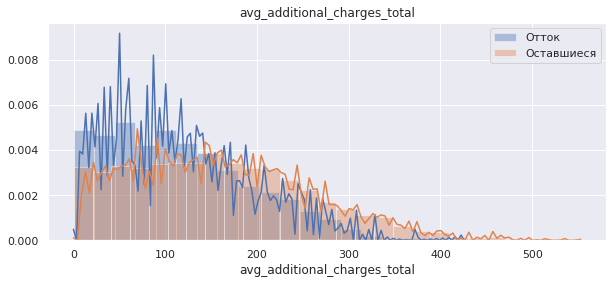

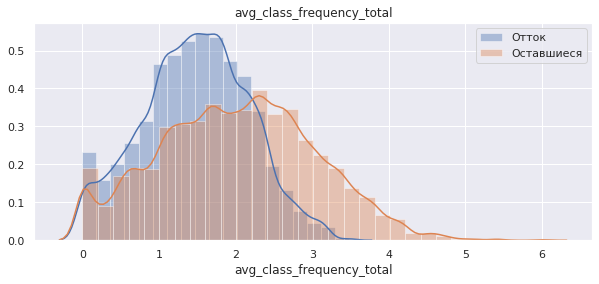

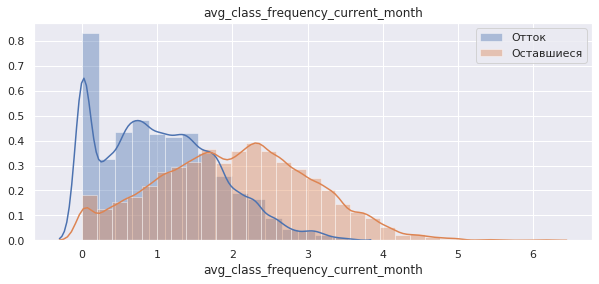

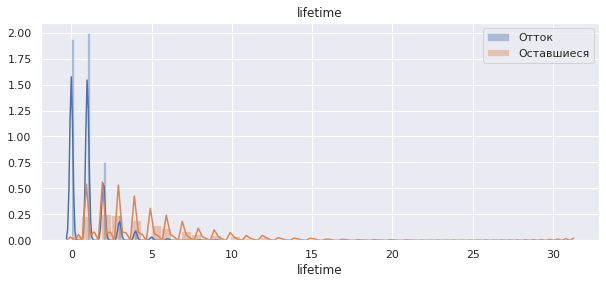

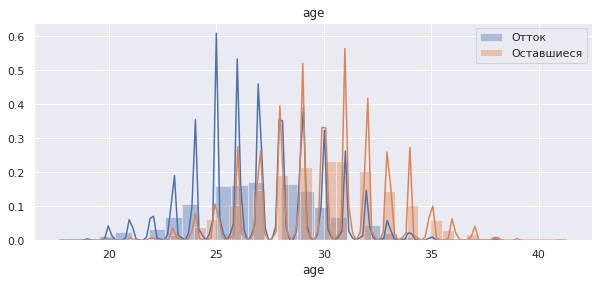

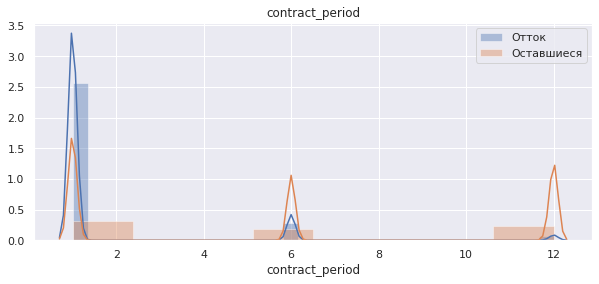

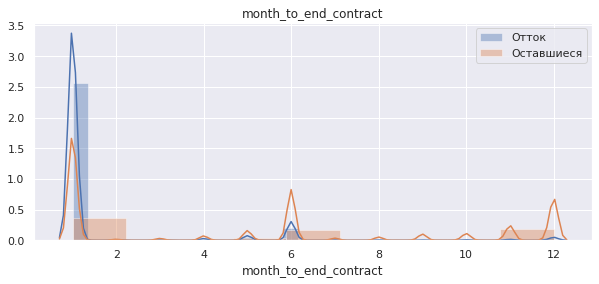

In [15]:
left = df[df['churn']==1]
stayed = df[df['churn']==0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in distplot_columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(left[column], kde_kws={'bw':0.1})
    sns.distplot(stayed[column], kde_kws={'bw':0.1})
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

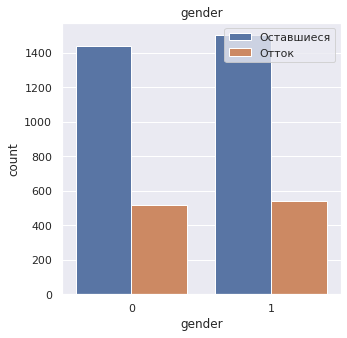

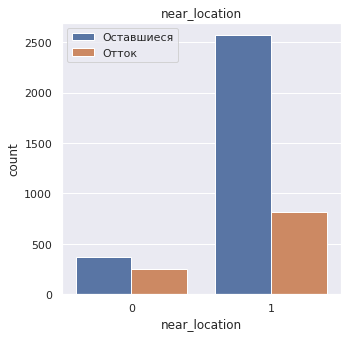

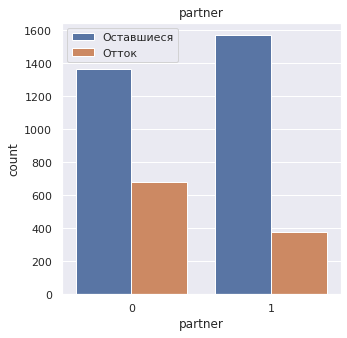

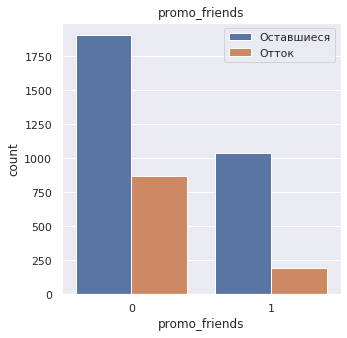

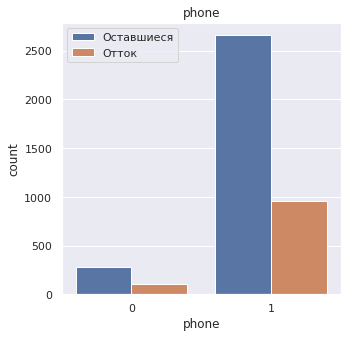

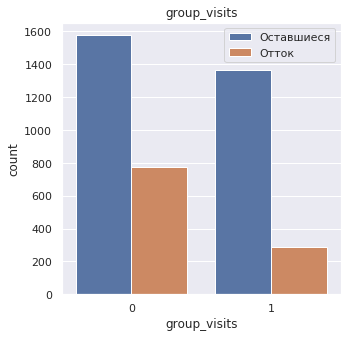

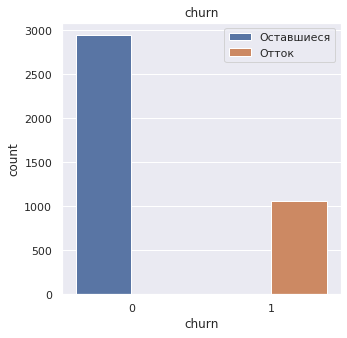

In [16]:
for column in df.columns:
    if column not in distplot_columns:
        plt.figure(figsize=(5, 5))
        sns.countplot(x = df[column], hue='churn', data=df)
#        df.groupby('churn')[column].hist()
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()

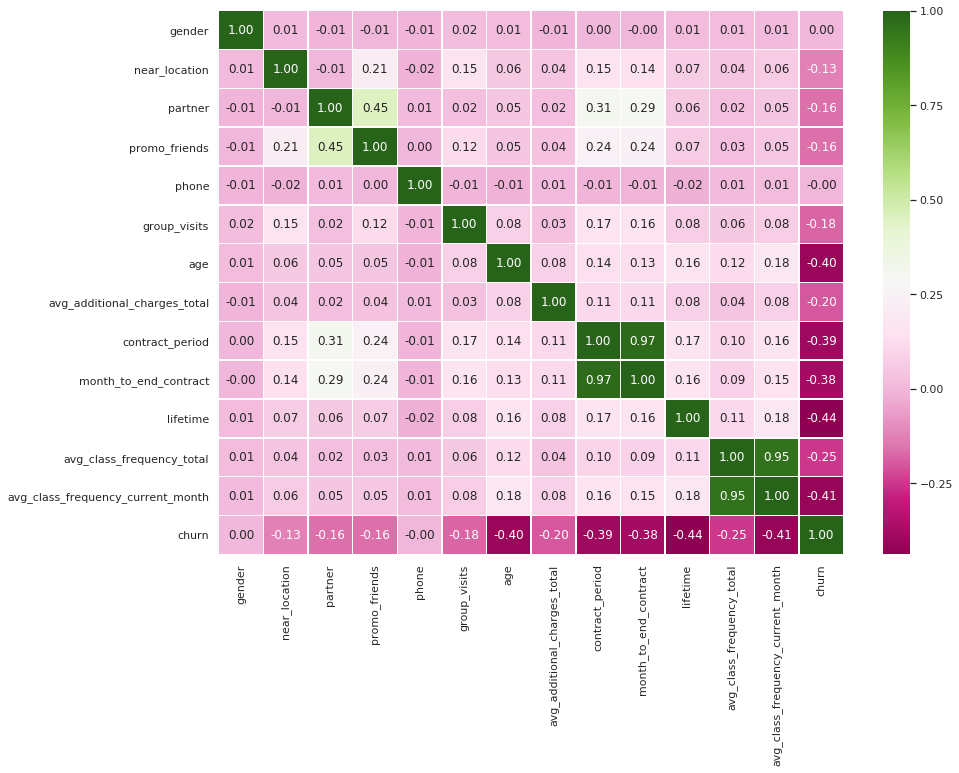

In [17]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

### Вывод:
- Явной зависимости факта оттока от признаков не обнаружено
- Имеются два мультиколлинеарных признака - contract_period и month_to_end_contact

<a name="stage_3"></a>
# Шаг 3. Постройте модель прогнозирования оттока пользователей


[К оглавлению](#table_of_contents)

In [18]:
X = df.drop('churn', axis = 1)
y = df['churn']

## Логистическая регрессия

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [23]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy | Нет баланса классов: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


## Случайный лес

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [25]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy | Нет баланса классов: 0.91
Precision: 0.83
Recall: 0.81
F1: 0.82


### Вывод
- Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии
- Таким образом, модель логистической регрессии показала себя лучше.

<a name="stage_4"></a>
# Шаг 4. Сделайте кластеризацию пользователей


[К оглавлению](#table_of_contents)

In [26]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

In [27]:
linked = linkage(df_sс, method = 'ward')

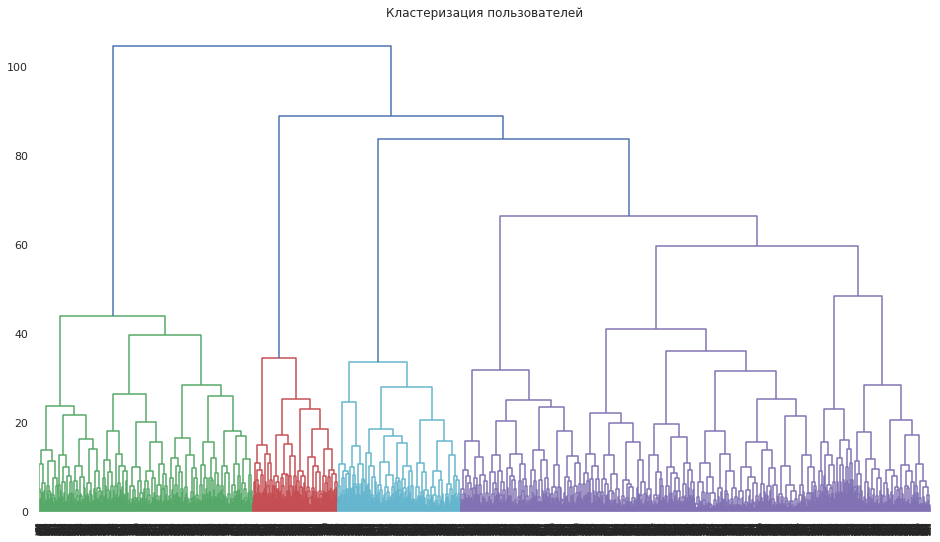

In [28]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

In [29]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

In [30]:
df.cluster.value_counts()

3    1262
0    1011
4     837
2     505
1     385
Name: cluster, dtype: int64

In [31]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.71,143.96,135.46,131.62,161.72
contract_period,10.88,4.79,2.35,1.95,2.67
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


### Описание кластеров:

**Кластер 0**
- Отток 27% - средний
- Живут далеко от фитнес-центра
- Обладатели в основном абонемента на 6 месяцев
- Сотрудник компании-партёра клуба почти на 50%
- Нет мобильного номера
- Среднее кол-во посещений за всё время и в последний месяц

**Кластер 1**
- Отток 55% - самый высокий
- Живут или работают недалеко от фитнес-центра
- Реже всех посещают фитнес-центр
- Нет сотрудников компании-партёра клуба 
- Почти нет некого по акции «приведи друга»
- Обладатели абонементов в основном на один месяц

**Кластер 2**
- Отток 5% - очень низкий
- Живут или работают недалеко от фитнес-центра
- Преобладают сотрудники компаний-партнеров - 78%
- Чаще всех посещают фитнес-центр
- Обладатели в основном абонемента на 3 месяца

**Кластер 3**
- Отток 40% - высокий
- Живут или работают недалеко от фитнес-центра
- Обладатели в основном абонемента на месяц
- Посещают только сотрудники компаний-партнеров
- Обладатели в основном абонемента на 3 месяца
- Редко посещают групповые занятия

**Кластер 4**
- Отток 2% - самый низкий
- Живут или работают недалеко от фитнес-центра
- Посещают в основном групповые занятия - 56%
- Чаще всех пришли по акции «приведи друга»
- Заключают договора на длительный срок - 12 месяцев


### Вывод 
- Самые хорошие 2 и 4 кластеры, похуже 0ой
- 1ый и 3ий - это посути один нащ большой кластер с сымым большим оттоком
- Выделяются четыре кластера и их достаточно для кластеризации (но использовали 5 как в задании)

## Построим распределения признаков для кластеров.

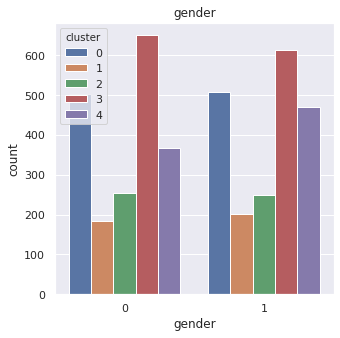

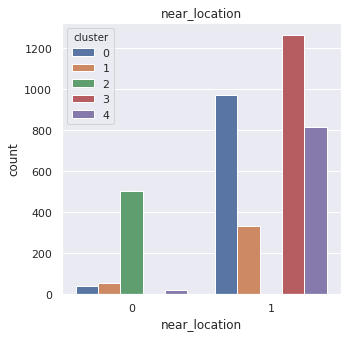

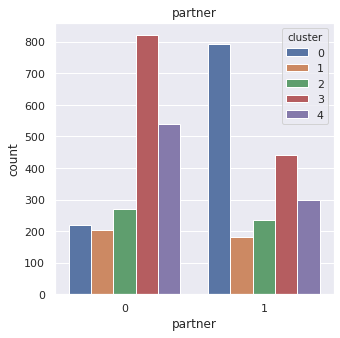

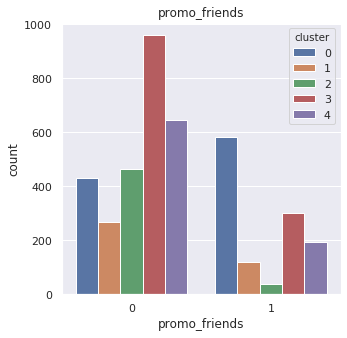

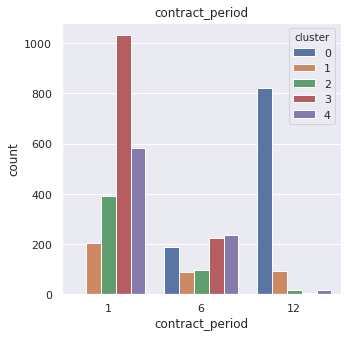

In [32]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

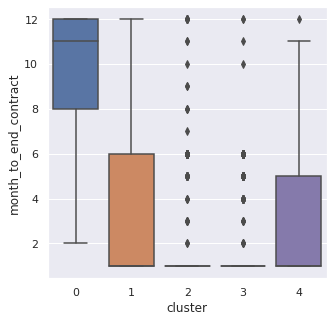

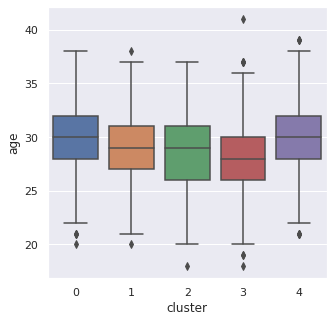

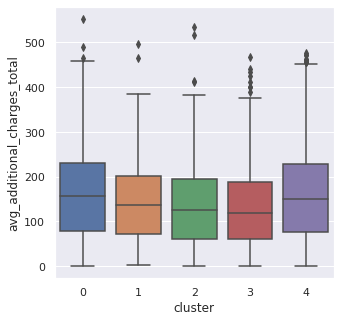

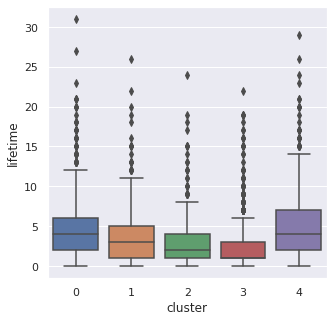

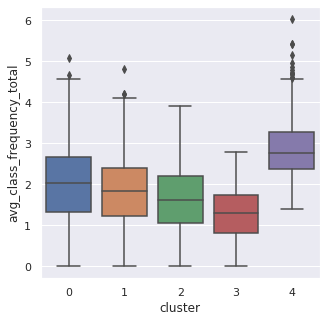

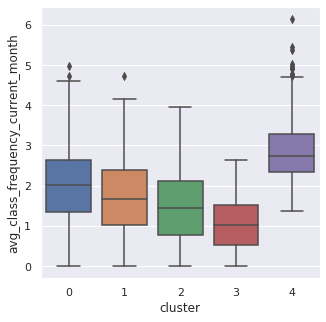

In [33]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 
               'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

<a name="stage_5"></a>
# Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами


[К оглавлению](#table_of_contents)

**Кластер 0**
- Отток 27% - средний
- Живут далеко от фитнес-центра
- Обладатели в основном абонемента на 6 месяцев
- Сотрудник компании-партёра клуба почти на 50%
- Нет мобильного номера
- Среднее кол-во посещений за всё время и в последний месяц

**Кластер 1**
- Отток 55% - самый высокий
- Живут или работают недалеко от фитнес-центра
- Реже всех посещают фитнес-центр
- Нет сотрудников компании-партёра клуба 
- Почти нет некого по акции «приведи друга»
- Обладатели абонементов в основном на один месяц

**Кластер 2**
- Отток 5% - очень низкий
- **Живут или работают недалеко от фитнес-центра**
- **Преобладают сотрудники компаний-партнеров - 78%**
- Чаще всех посещают фитнес-центр
- **Обладатели в основном абонемента на 3 месяца**

**Кластер 3**
- Отток 40% - высокий
- Живут или работают недалеко от фитнес-центра
- Обладатели в основном абонемента на месяц
- Посещают только сотрудники компаний-партнеров
- Обладатели в основном абонемента на 3 месяца
- Редко посещают групповые занятия

**Кластер 4**
- Отток 2% - самый низкий
- **Живут или работают недалеко от фитнес-центра**
- Посещают в основном групповые занятия - 56%
- **Чаще всех пришли по акции «приведи друга»**
- **Заключают договора на длительный срок - 12 месяцев**


## Рекомендации:

Вполне логично и очевидно итак - выгоднее продавать больше долгосрочных абонементов и тем, кто живет и работает недалеко от фитнес-клуба. Мы предсказали возможную вероятность оттока в последующий месяц клиентов в результате чего фитнес-клуб будет иметь потери.
Менеджерам мы должны дать такие рекомендации:
- Нужно создавать атмосферу маленького сообщества внутри фитнес-клуба (поздравлять с Днем рожднием членов клуба, обязательно что б была живая страничка в соцсетях...) 
- Глубже сегментировать оттекающих и тестировать по ним индивидуальные предложения
- Постоянно осуществлять анализ совмесно с менеджерами (что б понимать пропускную способность клуба, другие причины возможного оттока...)